# Problem 1: feature scaling and regularization

In class, we saw that support vector machines find a "max-margin" decision boundary for binary classification. In general, they solve the following optimization problem (which is equivalent to the constrained problem we wrote in class):

$$
\min_{w, b \in \mathbb{R}^d}
\frac{1}{2} \lVert w \rVert^2 + C \cdot
\sum_{i = 1}^{n} \max\Big(0, 1 - y^{(i)} (w^\mathsf{T} x^{(i)} + b)\Big).
$$

In general, this leads to "dense" weights $w$ which involve all the features. In this exercise, we replace the $\ell_2$ regularization with $\ell_1$ regularization, which simultaneously performs feature selection as it shrinks parameters of the $w$ vector to $0$. This is the so-called $\ell_1$-SVM:

$$
\min_{w, b \in \mathbb{R}^d}
\frac{1}{2} \lVert w \rVert_{1} + C \cdot
\sum_{i = 1}^{n} \max\Big(0, 1 - y^{(i)} (w^\mathsf{T} x^{(i)} + b)\Big).
$$

In this exercise, we will explore the sensitivity of the $\ell_1$-SVM to the scale of the features. 

Some information you might find helpful:

- The SVM classifier is implemented in `scikit-learn` as `LinearSVC`.
- To use the $\ell_1$-regularized version, you set `penalty = 'l1'` in the constructor of `LinearSVC`.
- You can compute cross-validation scores for *any* estimator in `scikit-learn` using the `cross_val_score` function.
- You can search for multiple parameters using the `param_grid` argument of `sklearn.model_selection.GridSearchCV`.

## Question 1

Use the `load_breast_cancer` function from `sklearn.datasets` to load the corresponding classification dataset. Split it into training and test sets using an appropriately sized split. Use 5-fold cross validation to train an SVM with the best parameter $C$ **without** performing any feature scaling. You may get lots of `ConvergenceWarning` messages - feel free to ignore them.

Use a sufficiently wide range for $C$: something like $10^{-3}$ to $10^{3}$ should be enough.

Plot the following quantities as functions of the regularization parameter, $C$:

- The F1 score on the training and validation sets.
- The value of each coefficient (i.e., the "regularization path").

For both plots, indicate the best value of $C$ using a vertical line (see `matplotlib.pyplot.axvline`).

> **Hint 1**: You can find a similar plot in our lecture notes from Lecture 4.

> **Hint 2**: To set the $C$ parameter, you can set the `C` parameter in the constructor of the `LinearSVC` class.

For the *best* value of $C$, as determined by cross-validation, also report the number of non-zero coefficients and the F1 score on the test set.

/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.p

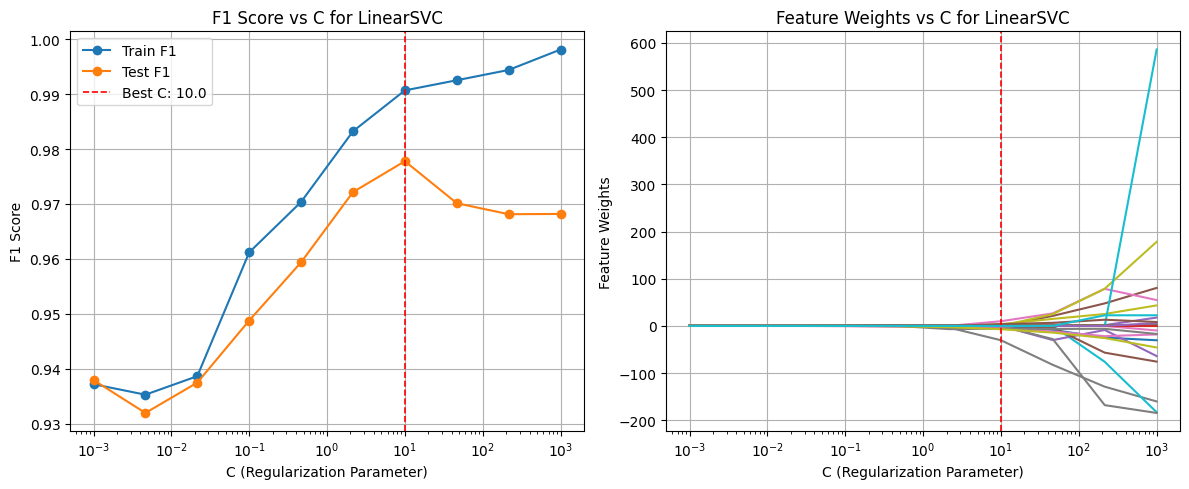

Best C: 10.0
Non-zero coefficients at best C: [ 2.59463319e-01  1.39750726e-04  4.67580830e-02 -3.45179176e-03
 -3.03952628e+01  3.72272562e+00  7.93469643e-01 -6.41667645e-02
 -5.44804260e-02  9.92657794e+00  8.44628188e-02 -1.47822156e-01
  5.39894172e-02 -7.64954349e-03 -5.66451428e-01  3.73209024e+00
 -4.82062209e+00 -5.77798394e+00 -6.98613366e+00]
Corresponding feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concave points' 'mean symmetry' 'texture error' 'perimeter error'
 'area error' 'concavity error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']
Count of non-zero features: 19
F1 Score on Training Set at Best C: 0.9906890130353817
F1 Score on Test Set at Best C: 0.9772727272727273


/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score

# load dataset and split into training and test sets
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# define C grid
C_grid = np.logspace(-3, 3, 10)

# fit LinearSVC, get F1 score, and store coefficients for each C
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

train_f1 = []
test_f1 = []
coef_path = np.zeros((len(C_grid), X.shape[1]))

for i, C in enumerate(C_grid):
    model = LinearSVC(penalty='l1', C=C, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_f1.append(f1_score(y_train, y_train_pred))

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    test_f1.append(np.mean(cv_scores))

    coef_path[i, :] = model.coef_.flatten()

train_f1 = np.array(train_f1)
test_f1 = np.array(test_f1)

# identify best C based on test F1 score
best_idx = int(np.argmax(test_f1))
best_C = C_grid[best_idx]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# plot F1 scores vs C
plt.subplot(1, 2, 1)
plt.plot(C_grid, train_f1, label='Train F1', marker='o')
plt.plot(C_grid, test_f1, label='Test F1', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for LinearSVC')
plt.axvline(best_C, color='red', linestyle='--', linewidth=1.2, label=f'Best C: {best_C}')
plt.legend()
plt.grid()

# plot each feature's weight vs C
plt.subplot(1, 2, 2)
for j in range(coef_path.shape[1]):
    plt.plot(C_grid, coef_path[:, j], label=f'Feature {j+1}')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Feature Weights')
plt.title('Feature Weights vs C for LinearSVC')
plt.axvline(best_C, color='red', linestyle='--', linewidth=1.2, label=f'Best C: {best_C}')
plt.grid()
plt.tight_layout()
plt.show()

# refit at best C and print non-zero coefficients
best_model = LinearSVC(penalty='l1', C=best_C, max_iter=10000, random_state=42)
best_model.fit(X_train, y_train)
best_coefs = best_model.coef_.flatten()
non_zero_indices = np.where(best_coefs != 0)[0]
print(f'Best C: {best_C}')
print(f'Non-zero coefficients at best C: {best_coefs[non_zero_indices]}')
print(f'Corresponding feature names: {feature_names[non_zero_indices]}')
print(f"Count of non-zero features: {len(non_zero_indices)}")

best_f1_train = f1_score(y_train, best_model.predict(X_train))
best_f1_test = f1_score(y_test, best_model.predict(X_test))
print(f'F1 Score on Training Set at Best C: {best_f1_train}')
print(f'F1 Score on Test Set at Best C: {best_f1_test}')

## Question 2

Repeat Question 1, but using a `StandardScaler` to center and standardize the training set (be careful to avoid any test-set leakage). You should use the same train-test split as in Question 1 (i.e., the samples in train and test set should be exactly the same).

Create the same plots as requested in Question 1, using the scaled features. As you perform cross-validation, make sure to use the same number of folds $K$ and range of regularization parameter $C$. Just like in Question 1, report the number of non-zero coefficients and F1 score on the test set.

/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/hw2/.venv/lib/python3.14/site-packages/sklearn/svm/_base.p

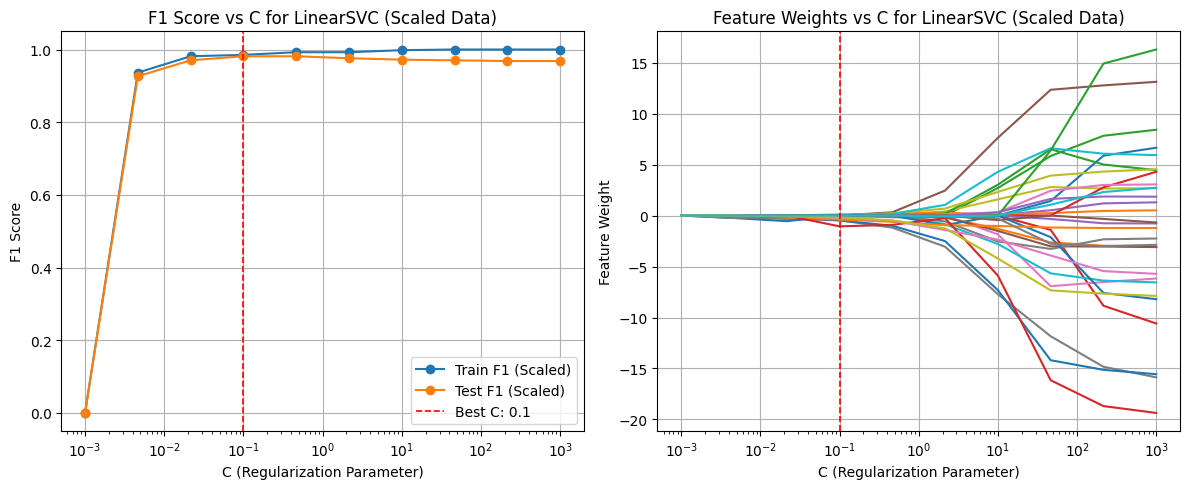

Best C (Scaled): 0.1
Non-zero coefficients at best C (Scaled): [-0.00362904 -0.47414205 -0.4751301   0.04565765  0.01683091  0.00411431
  0.10588754 -0.38962838 -1.0611868  -0.13101444 -0.2108855  -0.16758811]
Corresponding feature names (Scaled): ['mean texture' 'mean concave points' 'radius error' 'texture error'
 'compactness error' 'symmetry error' 'fractal dimension error'
 'worst texture' 'worst area' 'worst smoothness' 'worst concavity'
 'worst symmetry']
Count of non-zero coefficients (Scaled): 12
F1 Score on Training Set at Best C (Scaled): 0.9851851851851852
F1 Score on Test Set at Best C (Scaled): 0.9887640449438202


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline # for scaling

train_f1_scaled = []
test_f1_scaled = []
coef_path_scaled = np.zeros((len(C_grid), X.shape[1]))

# fit LinearSVC with scaling, get F1 score, and store coefficients for each C
for i, C in enumerate(C_grid):
    model = make_pipeline(
        StandardScaler(),
        LinearSVC(penalty='l1', C=C, max_iter=10000, random_state=42)
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_f1_scaled.append(f1_score(y_train, y_train_pred))

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    test_f1_scaled.append(np.mean(cv_scores))

    coef_path_scaled[i, :] = model.named_steps['linearsvc'].coef_.flatten()

train_f1_scaled = np.array(train_f1_scaled)
test_f1_scaled = np.array(test_f1_scaled)

# identify best C based on test F1 score for scaled data
best_idx_scaled = int(np.argmax(test_f1_scaled))
best_C_scaled = C_grid[best_idx_scaled]

plt.figure(figsize=(12, 5))

# plot F1 scores vs C for scaled data
plt.subplot(1, 2, 1)
plt.plot(C_grid, train_f1_scaled, label='Train F1 (Scaled)', marker='o')
plt.plot(C_grid, test_f1_scaled, label='Test F1 (Scaled)', marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C for LinearSVC (Scaled Data)')
plt.axvline(best_C_scaled, color='red', linestyle='--', linewidth=1.2, label=f'Best C: {best_C_scaled}')
plt.legend()
plt.grid()

# plot each feature's weight vs C for scaled data
plt.subplot(1, 2, 2)
for j in range(coef_path_scaled.shape[1]):
    plt.plot(C_grid, coef_path_scaled[:, j], label=f'Feature {j+1}')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Feature Weight')
plt.title('Feature Weights vs C for LinearSVC (Scaled Data)')
plt.axvline(best_C_scaled, color='red', linestyle='--', linewidth=1.2, label=f'Best C: {best_C_scaled}')
plt.grid()
plt.tight_layout()
plt.show()

# refit at best C for scaled data and print non-zero coefficients
best_model_scaled = make_pipeline(
    StandardScaler(),
    LinearSVC(penalty='l1', C=best_C_scaled, max_iter=10000, random_state=42)
)
best_model_scaled.fit(X_train, y_train)
best_coefs_scaled = best_model_scaled.named_steps['linearsvc'].coef_.flatten()
non_zero_indices_scaled = np.where(best_coefs_scaled != 0)[0]
print(f'Best C (Scaled): {best_C_scaled}')
print(f'Non-zero coefficients at best C (Scaled): {best_coefs_scaled[non_zero_indices_scaled]}')
print(f'Corresponding feature names (Scaled): {feature_names[non_zero_indices_scaled]}')
print(f"Count of non-zero coefficients (Scaled): {len(non_zero_indices_scaled)}")

best_f1_train_scaled = f1_score(y_train, best_model_scaled.predict(X_train))
best_f1_test_scaled = f1_score(y_test, best_model_scaled.predict(X_test))
print(f'F1 Score on Training Set at Best C (Scaled): {best_f1_train_scaled}')
print(f'F1 Score on Test Set at Best C (Scaled): {best_f1_test_scaled}')

## Question 3

Compare and contrast the results from Questions 1 and 2. Answer the following questions and justify your answers:

1. Does the curve for the F1 score (as a function of $C$) differ substantially?
2. Which model achieves the best performance on the test set (scaled vs. unscaled)?
3. How does the number of non-zero coefficients (for the best model found in each case) compare?
4. Which are the features corresponding to non-zero coefficients for each case?
5. Are there any features that you would exclude from scaling?
6. In your own words, and based on the previous observations, explain why it may make sense to scale the features before applying $\ell_1$ regularization.

Before you answer this question, make sure that your plots in Questions 1 & 2 have clear and legible axis labels, legends, and titles indicating exactly what they depict. Use consistent naming and plotting parameters (e.g., if you plot the regularization path using log-scale on the $x$-axis in Question 1, do the same for the corresponding plot in Question 2).

Add your answers in the empty text cell below. Feel free to make additional text cells as is needed for your answer, or create new code cells if you need to write additional code to justify any of your answers.

1. Yes, the curve for the F1 score vs C differs substantially between the scaled and unscaled models. Unscaled features peak at a larger C while the scaled features peak at a smaller C with a smoother CV/test curve. The train-test gap stays small for the scaled features, while it increases for the unscaled features at larger C values.

2. The scaled model achieves the best performance on the test set with an F1 score of 0.9888 compared to the unscaled model's F1 score of 0.9777. This is likely because scaling helps the model converge better and generalize well.

3. The scaled model has 12 non-zero coefficients, while the unscaled model has 19 non-zero coefficients. This is consistent with L1 penalization being scale-sensitive, leading to more effective feature selection when features are scaled. At the scaled optimal C=0.1, many coefficients remain near zero while at the unscaled optimal C=10, more coefficients are non-zero.

4. For unscaled, we have `['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concave points' 'mean symmetry' 'texture error' 'perimeter error'
 'area error' 'concavity error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']` and for scaled, we have `['mean texture' 'mean concave points' 'radius error' 'texture error'
 'compactness error' 'symmetry error' 'fractal dimension error'
 'worst texture' 'worst area' 'worst smoothness' 'worst concavity'
 'worst symmetry']`.

 5. No. As all features are continuous measurements with differing scales and units, it makes sense to scale all features before applying L1 regularization.

 6. Scaling features before applying L1 regularization is important because L1 penalization is sensitive to the scale of the features. If features are on different scales, the regularization may disproportionately penalize features with larger scales, leading to suboptimal feature selection and model performance. Scaling ensures that all features contribute equally to the regularization process, allowing for more effective sparsity and better generalization on unseen data.

# Problem 2: random forests

In class, we examined so-called *decision trees* for classification and regression. A drawback of decision trees is that they are very "noisy": even small changes to the training set can lead to very different decision boundaries. However, they have relatively low bias if they are allowed sufficient depth, because the number of decision regions is exponential in the depth. This makes them ideal candidates for a technique known as *ensembling*, where multiple "weak" models are averaged to form a more powerful model.

**Random forests** train multiple decision trees on randomly selected subsets of the training set, and then combine their predictions. Formally, they work as follows:

1. Draw $B$ random subsets from the training set (each subset consists of $n$ points drawn with replacement)
2. Train a decision tree, $f_{b}(\cdot)$ for each $b \in \{1, \ldots, B\}$.
3. Combine the predictions of the $B$ trees.

The last step is implemented differently depending on whether we are solving regression or classification. For regression, the final predictor $f_{\mathrm{rf}}(x)$ is the average of the $B$ trees:

$$
f_{\mathrm{rf}}(x) = \frac{1}{B} \sum_{b=1}^{B} f_{b}(x).
$$

For classification, the final predictor $f_{\mathrm{rf}}(x)$ is the class that receives the most votes from the $B$ trees:

$$
f_{\mathrm{rf}}(x) = \arg\max_{k = 1, \dots, K} \sum_{b=1}^{B} \mathbb{1}\{f_{b}(x) = k\}.
$$

In `scikit-learn`, random forests can be found in the the [`sklearn.ensemble`](https://scikit-learn.org/stable/api/sklearn.ensemble.html) module. Look for the classes called `RandomForestClassifier` and `RandomForestRegressor`.

## Question 1

Load the `covertype` dataset (`sklearn.datasets.fetch_covtype`). This is a 7-class classification problem containing 581012 samples and 54 integer features. Split into an appropriately sized train and test split, and perform any other necessary preprocessing. Justify your design choices for the following aspects:

- Did you need to adjust your splitting method to account for class imbalance?
- Did you need to perform any feature scaling or other preprocessing steps?

For this question, you should provide a code cell implementing the above steps as well as a text cell with your answers and justifications.

**Note**: it might take a while to process the `covertype` dataset. Your best bet is to run this in a `Colab` environment. Please make a post on Ed if you are unable to load or process the dataset.

In [3]:
from sklearn.datasets import fetch_covtype

# load dataset
cov = fetch_covtype(as_frame=True)
X, y = cov.data, cov.target

# check class distribution
class_dist = y.value_counts(normalize=True).sort_index()
print("Class distribution in the covtype dataset:")
print(class_dist.to_string())

# split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y, shuffle=True)

print(f"Training set size: {X_train.shape[0]} samples")

Class distribution in the covtype dataset:
Cover_Type
1    0.364605
2    0.487599
3    0.061537
4    0.004728
5    0.016339
6    0.029891
7    0.035300
Training set size: 435759 samples


- Yes, I used stratified splitting to ensure that each class is proportionally represented in both the training and test sets. This is important because the `covertype` dataset has class imbalance, and stratified splitting helps maintain the original class distribution, which is crucial for training a robust model.

- No, I did not perform any feature scaling or other preprocessing steps. The features in the `covertype` dataset are all integer values representing categorical and continuous variables that are already on a similar scale. Random forests are also relatively insensitive to feature scaling, so scaling is not necessary in this case.

## Question 2

Train a random forest classifier on the resulting `covertype` dataset from Question 1, using 5-fold cross validation to find the best values for the following parameters:

- `n_estimators`: the number of trees in the forest (try values of $\{10, 20, \dots, 90, 100\}$).
- `max_depth`: the maximum depth of each decision tree (try values of $\{2, 4\}$).
- `max_features`: the number of (randomly chosen) features to select from in each split (try values of `"sqrt"` or `"log2"`).

To determine the "best" value of each parameter, you can either use accuracy (default setting) or F1 score (use `scoring="f1_weighted"` in the constructor of `GridSearchCV`). Which metric is most appropriate for this problem? Justify your choice.

Add your code to the cell below.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# set up RandomForestClassifier and parameter grid
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# perform grid search with 5-fold cross-validation using weighted F1 score
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated F1 score: {grid_search.best_score_}")

KeyboardInterrupt: 

I used the weighted F1 score as the metric for determining the best parameters because the `covertype` dataset is imbalanced across its 7 classes. The weighted F1 score accounts for both precision and recall while also considering the support (number of true instances) for each class. This ensures that the performance on minority classes is not overshadowed by majority classes, leading to a more balanced evaluation of the model's effectiveness across all classes.

## Question 3

1. Report the best values, as determined by cross-validation, for each parameter in Question 2, as well as the performance on the test set.

2. Create the following plot in the code cell below: fix `max_depth = 2` and `max_features = "sqrt"`, and plot the cross-validation accuracy as a function of `n_estimators` $\in \{10, 20, \dots, 90, 100\}$). Do you notice any trends as you vary `n_estimators`?

3. As you increase the number `n_estimators`, are you increasing the bias or the variance of the model, and why?


For this question, add your answers in a new text cell below the following code cell.

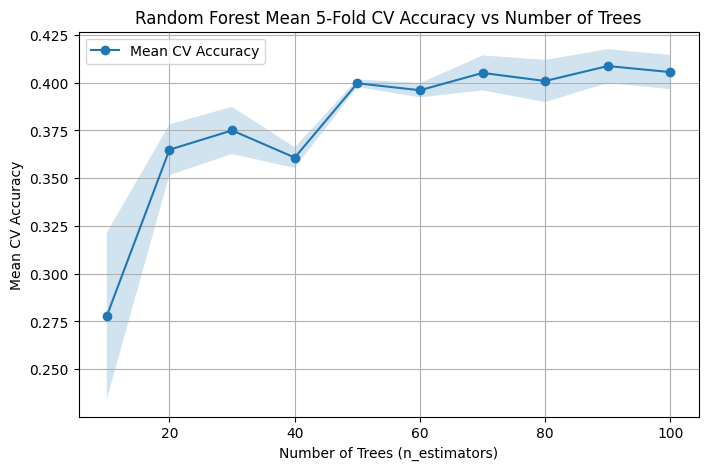

In [ ]:
max_depth = 2
max_features = 'sqrt'

n_estimators = np.arange(10, 101, 10)

mean_acc = []
std_acc = []

# evaluate RandomForestClassifier for different n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=max_features, random_state=42, class_weight='balanced')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_acc.append(np.mean(cv_scores))
    std_acc.append(np.std(cv_scores))

mean_acc = np.array(mean_acc)
std_acc = np.array(std_acc)

import matplotlib.pyplot as plt

# plot mean CV accuracy vs n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, mean_acc, label='Mean CV Accuracy', marker='o')
plt.fill_between(n_estimators, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2)
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.title('Random Forest Mean 5-Fold CV Accuracy vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

Based on the 5-fold cross-validation results using the weighted F1 score, the best parameters from Q2 are `max_depth = 4`, `max_features = 'sqrt'`, and `n_estimators = 50`, which give a best weighted F1 score of 0.518.

When fixing `max_depth = 2` and `max_features = 'sqrt'` and increasing `n_estimators` from 10 to 100, the cross-validated accuracy initially rises sharply, then plateaus around 0.40–0.42. The steep improvement for smaller forests indicate a rapid reduction in variance as more trees are added, while the plateau suggests that adding more trees beyond a certain point yields diminishing returns in terms of accuracy. Overall, accuracy stabilizes as `n_estimators` increases, showing the model benefits from ensembling up to a certain convergence point.

As we increase `n_estimators`, we are primarily reducing the variance of the model. Each tree in the random forest is a high-variance estimator but by averaging the predictions of many trees, we reduce the overall variance of the ensemble. The bias remains relatively unchanged because each individual tree is still a weak learner with its own bias. Thus, increasing `n_estimators` helps to stabilize the predictions and improve generalization by lowering variance without significantly affecting bias.

## Question 4

Random forests allow us to calculate the *feature importance* of a given feature. Roughly speaking, this metric reflects how often a feature is used to generate splits in the decision trees making up the forest.

Make a plot of the feature importance for the "best" random forest model found in Question 2. In a separate panel, plot the number of distinct values for each feature. For the features of highest importance, do you observe any relationship between their importance and the number of distinct values they take?

> **Note**: You can access the feature importance of a random forest model `rf` via the `rf.feature_importances_` attribute. This [page](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) has a few examples of plotting feature importances.

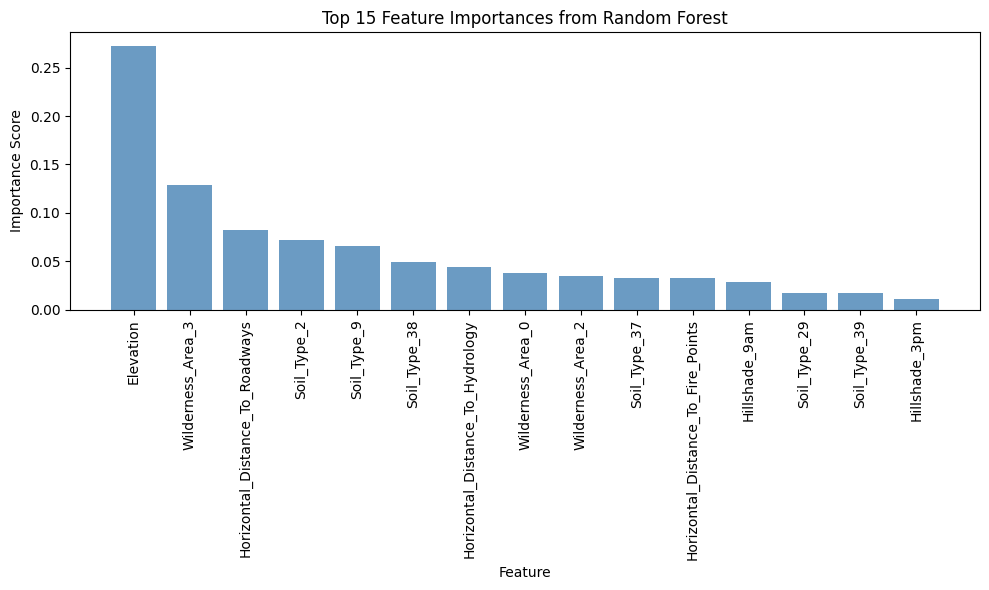

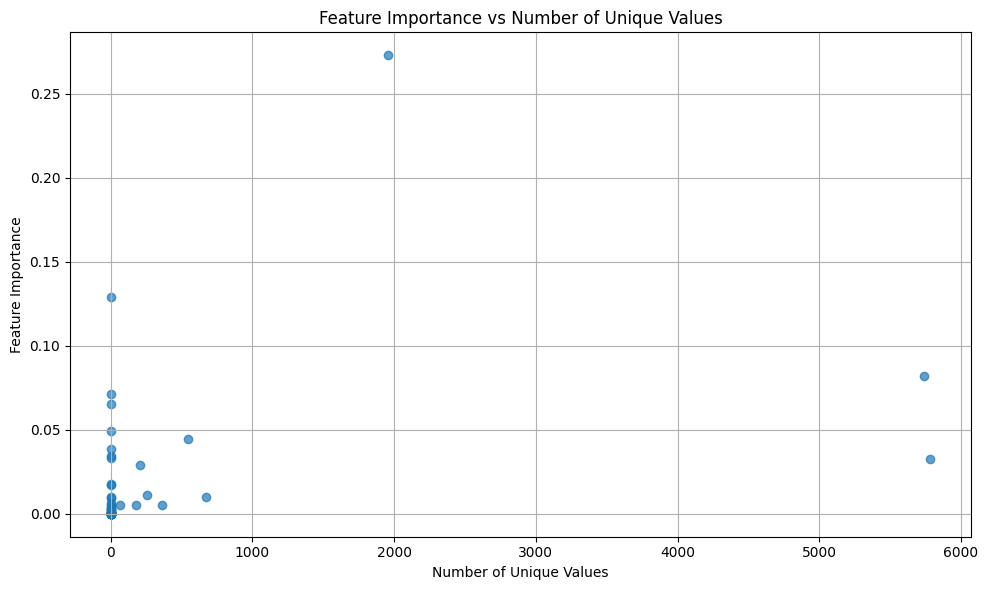

In [ ]:
# use best estimator from Q2
best_rf = grid_search.best_estimator_

# analyze feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# number of unique values per feature
num_unique = X_train.nunique().values

# sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]
sorted_unique = num_unique[sorted_idx]

# plot top 15 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15), sorted_importances[:15], color='steelblue', alpha=0.8)
plt.xticks(range(15), sorted_features[:15], rotation=90)
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

# plot feature importance vs number of unique values
plt.figure(figsize=(10, 6))
plt.scatter(sorted_unique, sorted_importances, alpha=0.7)
plt.title('Feature Importance vs Number of Unique Values')
plt.xlabel('Number of Unique Values')
plt.ylabel('Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot comparing feature importance and number of distinct values shows no clear correlation. Some features with high importance have many distinct values, while others have few. Similarly, some features with low importance have many distinct values, while others have few. This suggests that the number of distinct values alone does not determine a feature's importance in the random forest model, but rather, it is how informative the feature is for making splits that matters most.